In [ ]:

import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive
from tensorflow.keras import datasets, layers, models

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


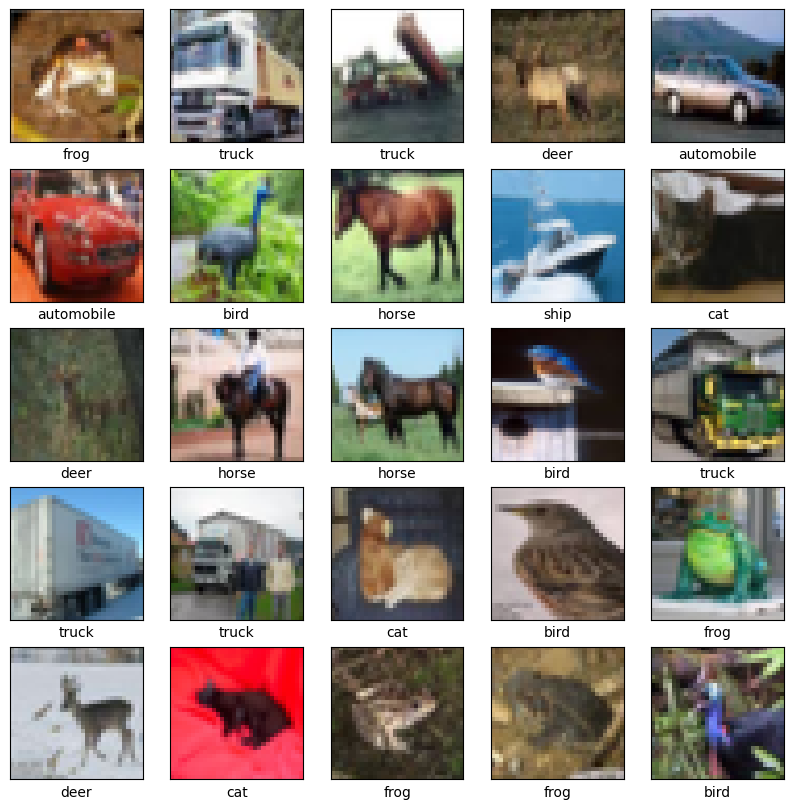

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0820 - accuracy: 0.6175 - val_loss: 1.0956 - val_accuracy: 0.6097
Epoch 2/2
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9848 - accuracy: 0.6525 - val_loss: 0.9830 - val_accuracy: 0.6531


313/313 - 5s - loss: 0.9830 - accuracy: 0.6531 - 5s/epoch - 16ms/step


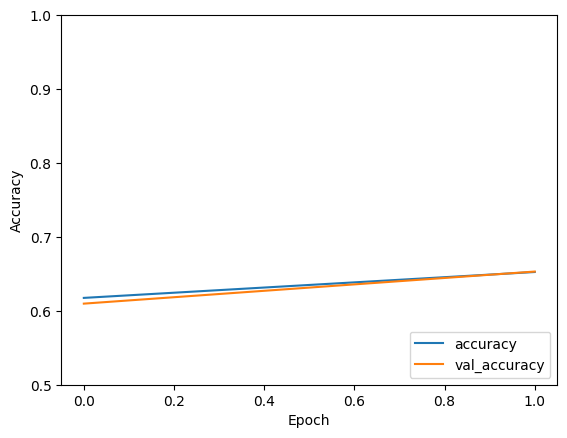

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Classificação de imagem

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 3s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


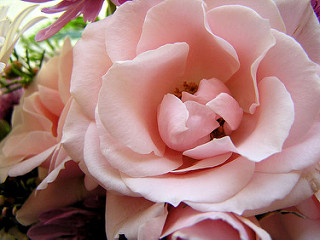

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

# Carregar dados usando um utilitário Keras

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


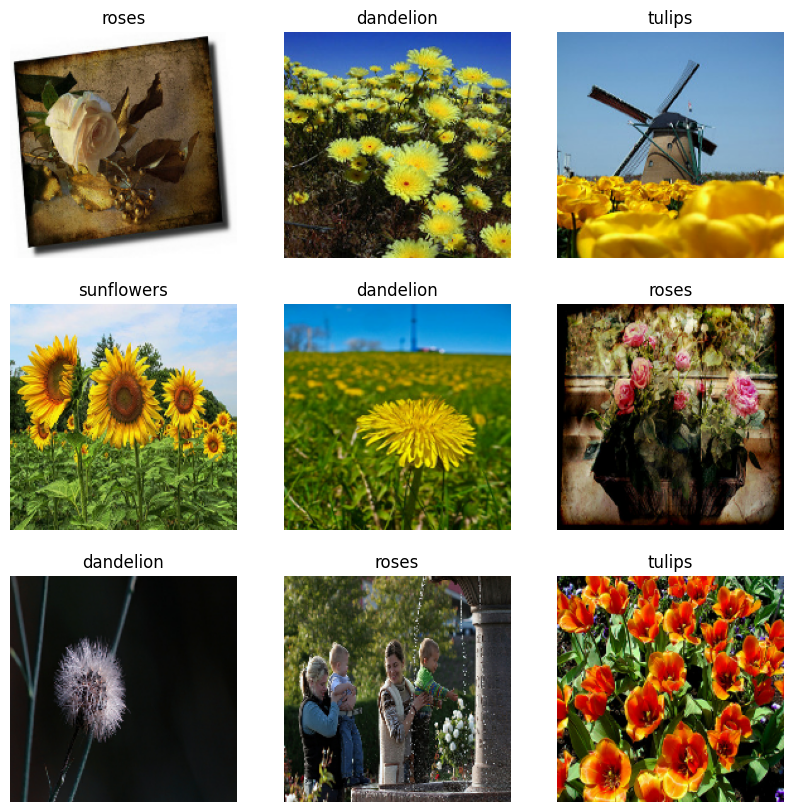

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 105s 1s/step - loss: 1.2760 - accuracy: 0.4605 - val_loss: 1.0887 - val_accuracy: 0.5450
Epoch 2/5
92/92 [==============================] - 106s 1s/step - loss: 0.9815 - accuracy: 0.6104 - val_loss: 0.9427 - val_accuracy: 0.6185
Epoch 3/5
92/92 [==============================] - 101s 1s/step - loss: 0.8165 - accuracy: 0.6843 - val_loss: 0.9197 - val_accuracy: 0.6417
Epoch 4/5
92/92 [==============================] - 104s 1s/step - loss: 0.6523 - accuracy: 0.7531 - val_loss: 0.8609 - val_accuracy: 0.6730
Epoch 5/5
92/92 [==============================] - 104s 1s/step - loss: 0.4162 - accuracy: 0.8518 - val_loss: 0.9190 - val_accuracy: 0.6594


Test my images

In [ ]:
import zipfile

# Define the path to the ZIP file
zip_file_path = 'TestImages.zip'

# Define the directory where you want to unzip the contents
extracted_dir_path = '/content/extracted/'

# Create the target directory if it doesn't exist
import os
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List the contents of the extracted directory
FILES_NAMES = os.listdir(extracted_dir_path)
FILES_NAMES

['Tablet', 'Cat']

In [82]:
from PIL import Image
import os
from IPython.display import display

# Specify the directory path where the images were extracted
extracted_dir_path = '/content/extracted/Cat'

# List all the files in the directory
file_names = os.listdir(extracted_dir_path)

# Loop through the list of file names
for file_name in file_names:
    # Get the full path to each image file
    image_path = os.path.join(extracted_dir_path, file_name)

    # Check if the file is an image (you can add more image formats if needed)
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        # Open the image using PIL
        img = Image.open(image_path)

        # Display the image using IPython.display
       # display(img)

        # Close the image
        img.close()


IndexError: ignored

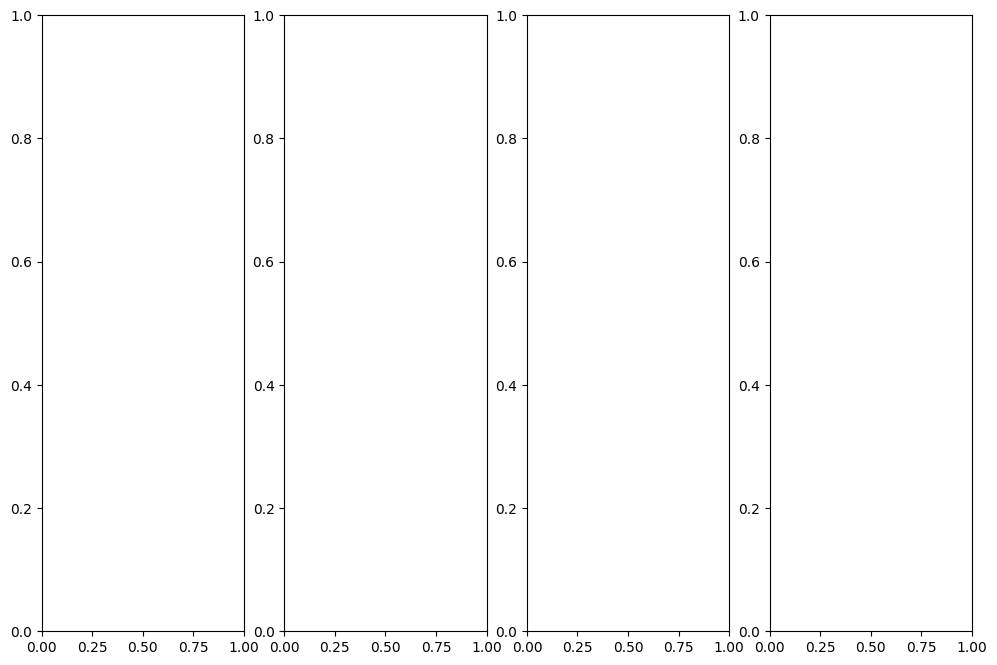

In [83]:
from PIL import Image
import os
from IPython.display import display
import matplotlib.pyplot as plt

# Specify the directory path where the images were extracted
extracted_dir_path = '/content/extracted/'

# List all the files in the directory
file_names = os.listdir(extracted_dir_path)

# Create a grid for plotting
num_cols = 4  # Number of columns in the grid
num_rows = (len(file_names) + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Loop through the list of file names and plot each image in the grid
for i, file_name in enumerate(file_names):
    # Get the full path to each image file
    image_path = os.path.join(extracted_dir_path, file_name)

    # Check if the file is an image (you can add more image formats if needed)
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        # Open the image using PIL
        img = Image.open(image_path)

        # Calculate the row and column for this image
        row = i // num_cols
        col = i % num_cols

        # Plot the image in the corresponding grid cell
        axes[row, col].imshow(img)
        axes[row, col].set_title(file_name)
        axes[row, col].axis('off')

        # Close the image
        img.close()

# Remove any empty subplots
for i in range(len(file_names), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Adjust the layout
plt.tight_layout()

# Show the grid of images
plt.show()


In [84]:
import tensorflow as tf

# Define the directory path where the images were extracted
extracted_dir_path = '/content/extracted/'

# Parameters for image dataset
data_dir = extracted_dir_path  # Set data_dir to the extracted directory path
batch_size = 32
img_height = 256  # Set your desired image height
img_width = 256   # Set your desired image width

# Create the image dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 13 files belonging to 2 classes.
Using 11 files for training.


In [85]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13 files belonging to 2 classes.
Using 2 files for validation.


In [86]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Tablet']


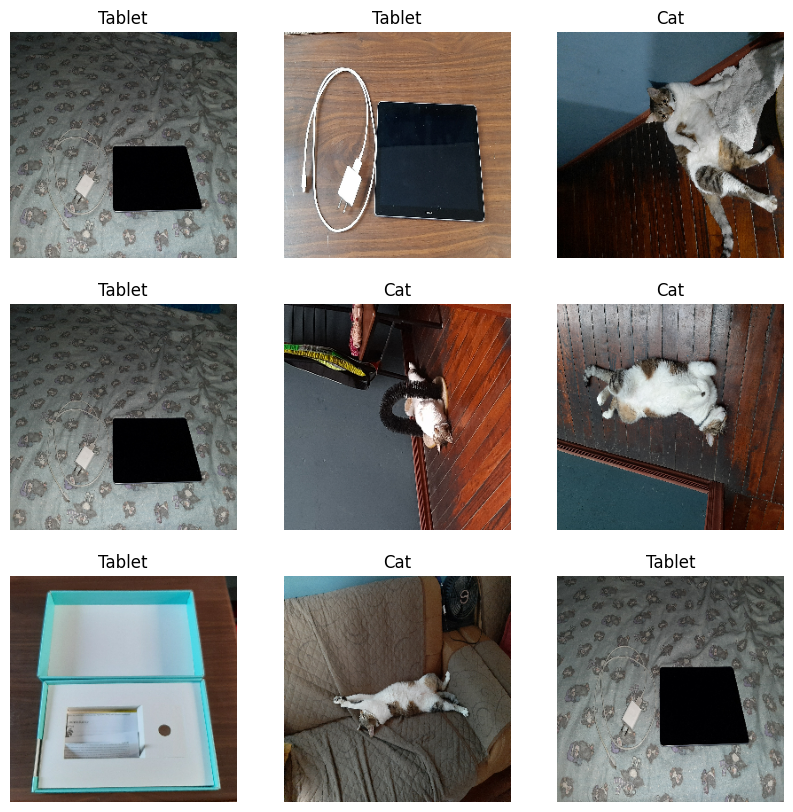

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [88]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(11, 256, 256, 3)
(11,)


In [89]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [90]:
normalization_layer = layers.Rescaling(1./255)

In [91]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [92]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [93]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 64)       

In [95]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6856 - accuracy: 0.5455 - val_loss: 8.8748 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 4.0230 - accuracy: 0.6364 - val_loss: 1.2961 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 0.2891 - accuracy: 0.7273 - val_loss: 2.8814 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 788ms/step - loss: 2.5649 - accuracy: 0.3636 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 758ms/step - loss: 0.3914 - accuracy: 0.8182 - val_loss: 0.6804 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 774ms/step - loss: 0.1128 - accuracy: 1.0000 - val_loss: 1.3313 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 858ms/step - loss: 0.1943 - accuracy: 0.9091 - val_loss: 1.3682 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=============

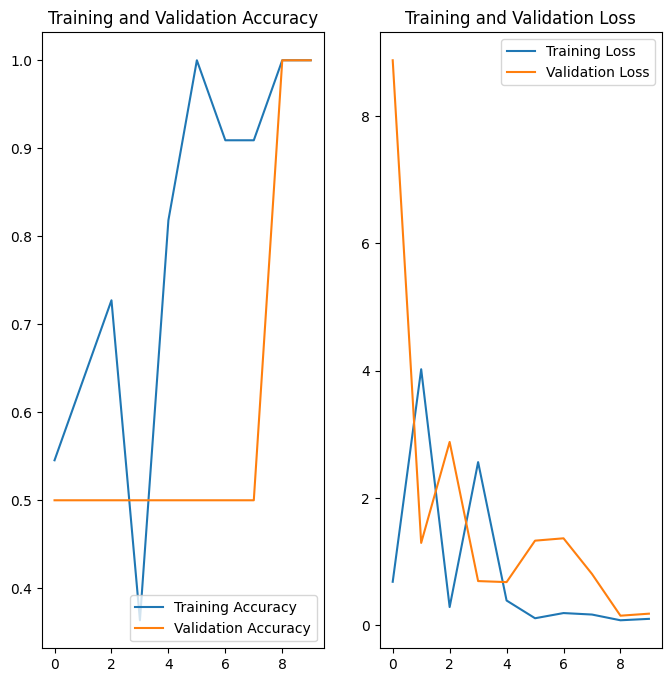

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [97]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

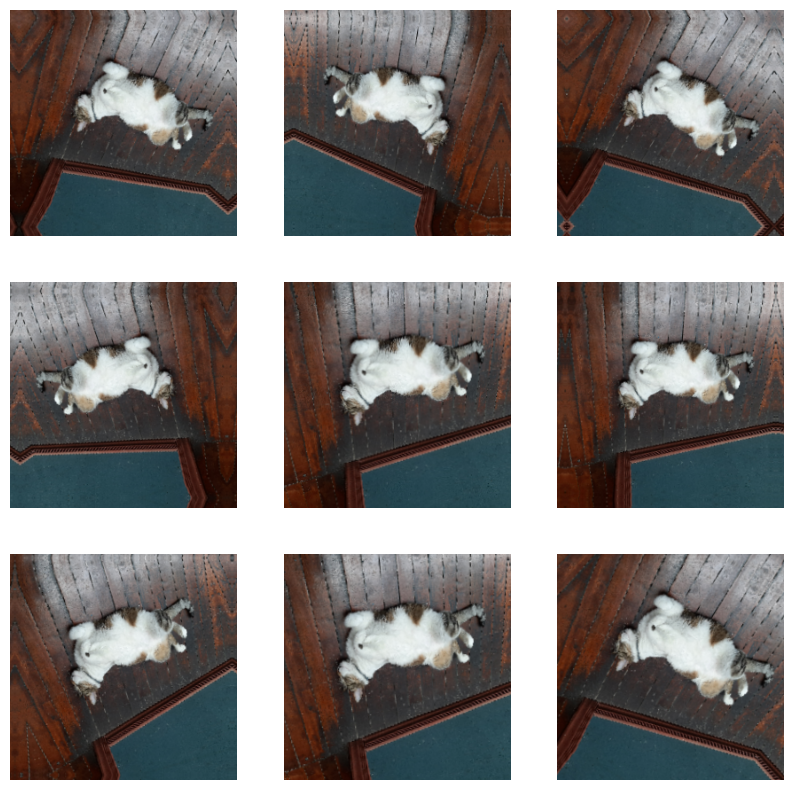

In [98]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [99]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [100]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                

In [102]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: 0.6890 - accuracy: 0.7273 - val_loss: 4.6810 - val_accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 2s 2s/step - loss: 2.1624 - accuracy: 0.6364 - val_loss: 0.6185 - val_accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 2s 2s/step - loss: 0.7076 - accuracy: 0.3636 - val_loss: 0.5603 - val_accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 1s 1s/step - loss: 0.4109 - accuracy: 0.8182 - val_loss: 0.6118 - val_accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 1s 860ms/step - loss: 0.4750 - accuracy: 0.7273 - val_loss: 0.4220 - val_accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 1s 847ms/step - loss: 0.3965 - accuracy: 0.8182 - val_loss: 0.3206 - val_accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 1s 1s/step - loss: 0.3066 - accuracy: 1.0000 - val_loss: 0.2786 - val_accuracy: 1.0000
Epoch 8/15
1/1 [===================

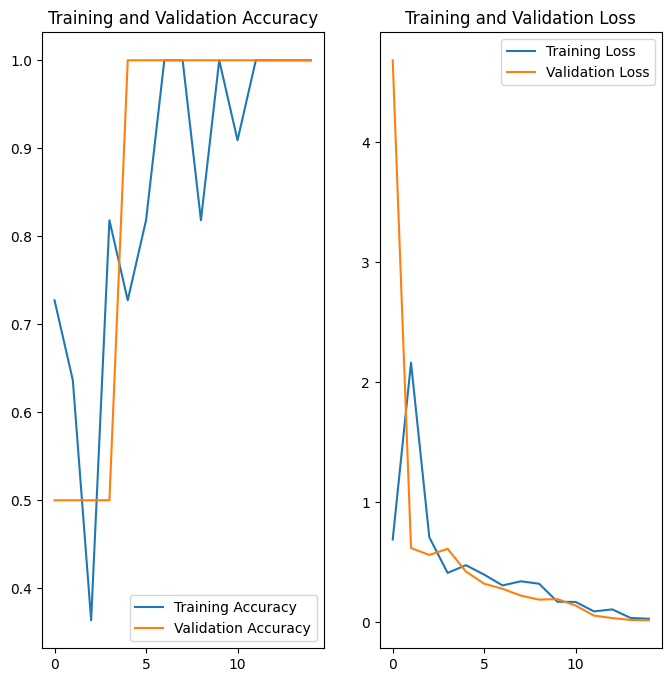

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [107]:
# Define the path to your image
#image_path = '/content/new_Cat.jpg'
image_path = "/content/test.jpeg"

# Load and preprocess the image
img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# Make predictions on the image
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Print the results
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 103ms/step
This image most likely belongs to Tablet with a 94.64 percent confidence.
